<a href="https://colab.research.google.com/github/shwldus067/colab/blob/main/KLB_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
Data=pd.read_csv("/content/drive/MyDrive/산업수학1조/dataset.csv")

#데이터 확인
"Unnamed: 0"의 컬럼 이름을 "년도"로 변경한다.  
"순위" 데이터는 PTS로 정해진 값이므로 삭제한다.  
"년도", "선수명", "팀" 컬럼은 Label Encoding으로 정수 값으로 인코딩한다.  


In [ ]:
Data.head()

,Unnamed: 0,순위,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
0,2012-2013,1,제스퍼 존슨,부산KT,19.7,7.5,11.4,52.3,3.2,3.7,86.6,4.0,6.4,62.1,1.7,6.4,8.0,3.1,2.2,1.7,0.2,2.2
1,2012-2013,2,애런 헤인즈,서울SK,19.1,7.5,13.3,55.8,3.8,4.6,82.5,4.9,8.0,61.5,2.6,5.8,8.4,2.4,1.7,1.2,0.9,1.8
2,2012-2013,3,리온 윌리엄스,고양오리온스,18.5,7.1,11.4,61.7,4.4,5.3,83.1,6.1,9.5,63.7,4.0,7.4,11.4,1.6,2.6,1.6,0.7,2.9
3,2012-2013,4,리카르도 포웰,인천전자랜드,18.4,7.4,11.9,55.6,2.6,3.6,73.0,5.4,8.4,65.2,1.5,5.4,7.0,2.2,2.1,1.0,0.8,2.0
4,2012-2013,5,후안 파틸로,안양 KGC,18.3,7.6,13.3,57.3,3.0,4.7,65.1,5.4,8.0,66.7,2.0,5.6,7.6,1.2,2.3,1.2,0.8,1.9


In [5]:
Data=Data.rename(columns={'Unnamed: 0':'년도'})

In [ ]:
Data.isnull().sum()

년도     0
순위     0
선수명    0
팀      0
PTS    0
FG     0
FGA    0
FG%    0
FT     0
FTA    0
FT%    0
PP     0
PPA    0
PP%    0
OFF    0
DEF    0
TOT    0
AST    0
TO     0
STL    0
BS     0
PF     0
dtype: int64

In [ ]:
len(Data)

1808

In [6]:
Data.drop('순위', axis=1, inplace=True)

In [ ]:
print(Data['년도'].value_counts())
print(Data['선수명'].value_counts())
print(Data['팀'].value_counts())

2018-2019    198
2020-2021    197
2016-2017    191
2015-2016    191
2019-2020    190
2017-2018    185
2012-2013    179
2014-2015    176
2013-2014    171
2021-2022    130
Name: 년도, dtype: int64
최승욱       13
김동욱       13
박지훈       12
이현민       10
김선형       10
          ..
드웨인 미첼     1
키퍼 사익스     1
김종학        1
존 토마스      1
숀 롱        1
Name: 선수명, Length: 540, dtype: int64
부산KT         189
창원LG         175
전주KCC        167
서울삼성         163
서울SK         161
인천전자랜드       160
고양오리온        118
안양KGC        113
원주동부          87
울산모비스         87
원주DB          76
울산현대모비스       75
안양 KGC        67
고양오리온스        53
창원 LG         15
서울 SK         14
서울 삼성         13
울산 현대모비스      13
원주 DB         13
대구 한국가스공사     13
고양 오리온        12
수원 KT         12
전주 KCC        12
Name: 팀, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
LE=LabelEncoder()
LE.fit(Data['년도'])
Data['년도']=LE.transform(Data['년도'])

In [9]:
Data['년도']

0       0
1       0
2       0
3       0
4       0
       ..
1803    9
1804    9
1805    9
1806    9
1807    9
Name: 년도, Length: 1808, dtype: int64

In [10]:
LE.fit(Data['선수명'])
Data['선수명']=LE.transform(Data['선수명'])
LE.fit(Data['팀'])
Data['팀']=LE.transform(Data['팀'])

In [ ]:
Data.head()

,년도,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
0,0,423,4,19.7,7.5,11.4,52.3,3.2,3.7,86.6,4.0,6.4,62.1,1.7,6.4,8.0,3.1,2.2,1.7,0.2,2.2
1,0,272,7,19.1,7.5,13.3,55.8,3.8,4.6,82.5,4.9,8.0,61.5,2.6,5.8,8.4,2.4,1.7,1.2,0.9,1.8
2,0,140,2,18.5,7.1,11.4,61.7,4.4,5.3,83.1,6.1,9.5,63.7,4.0,7.4,11.4,1.6,2.6,1.6,0.7,2.9
3,0,143,18,18.4,7.4,11.9,55.6,2.6,3.6,73.0,5.4,8.4,65.2,1.5,5.4,7.0,2.2,2.1,1.0,0.8,2.0
4,0,539,10,18.3,7.6,13.3,57.3,3.0,4.7,65.1,5.4,8.0,66.7,2.0,5.6,7.6,1.2,2.3,1.2,0.8,1.9


In [ ]:
Data.to_csv('data.csv', index=False)

In [ ]:
Data.describe()

,년도,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,4.451881,262.196903,11.868916,5.978097,2.286670,3.441427,43.210177,0.867810,1.219303,57.370907,1.386560,2.428097,48.420465,0.818142,1.789546,2.606361,1.284237,0.893805,0.551936,0.215321,1.506305
std,2.785230,159.966543,6.750594,5.684488,2.231146,3.630565,19.422882,1.042247,1.433649,31.465056,1.709122,2.800606,22.652367,0.893166,1.827369,2.623089,1.307134,0.765856,0.469957,0.359383,0.826789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,108.000000,7.000000,1.500000,0.600000,0.900000,37.800000,0.100000,0.200000,50.000000,0.300000,0.500000,42.900000,0.200000,0.500000,0.800000,0.300000,0.300000,0.200000,0.000000,1.000000
50%,4.000000,269.500000,11.000000,4.100000,1.500000,2.100000,48.100000,0.500000,0.700000,67.900000,0.700000,1.300000,53.800000,0.500000,1.200000,1.700000,0.900000,0.700000,0.500000,0.100000,1.500000
75%,7.000000,398.250000,18.000000,9.200000,3.400000,5.000000,53.625000,1.225000,1.800000,78.400000,1.900000,3.400000,61.100000,1.000000,2.500000,3.500000,1.900000,1.300000,0.800000,0.300000,2.100000
max,9.000000,539.000000,22.000000,28.800000,11.200000,19.600000,100.000000,8.000000,11.000000,100.000000,10.000000,16.900000,100.000000,6.100000,11.000000,14.700000,7.700000,4.500000,4.000000,4.000000,5.000000


#데이터 분포 확인
pearson correlation 값 확인  
seaborn으로 heatmap 생성  


In [ ]:
Data.corr(method='pearson')

,년도,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
년도,1.000000,0.008994,-0.018923,0.060731,0.056958,0.021889,0.008414,0.021942,0.021874,-0.076854,0.049417,0.054958,-0.004665,0.053697,0.062144,0.062318,0.054992,0.007799,0.024889,0.024096,-0.019742
선수명,0.008994,1.000000,-0.020410,0.023166,0.021009,0.025387,0.029163,0.039550,0.047102,0.002015,0.026334,0.030275,0.019733,0.067585,0.025737,0.040600,-0.008825,0.004629,0.013047,0.061381,0.034678
팀,-0.018923,-0.020410,1.000000,-0.006177,-0.006171,0.000321,-0.001142,-0.001992,0.009073,-0.020612,0.003286,0.002033,0.018641,0.027517,0.016317,0.021383,-0.024179,0.019710,-0.012872,-0.005673,0.019562
PTS,0.060731,0.023166,-0.006177,1.000000,0.991391,0.931973,0.431428,0.893828,0.892130,0.429781,0.897335,0.900913,0.390161,0.706493,0.865283,0.843817,0.616568,0.825327,0.679817,0.604538,0.618119
FG,0.056958,0.021009,-0.006171,0.991391,1.000000,0.958595,0.440654,0.855004,0.865492,0.393427,0.932715,0.931228,0.397767,0.743398,0.887214,0.871636,0.583381,0.812890,0.656384,0.640153,0.610150
FGA,0.021889,0.025387,0.000321,0.931973,0.958595,1.000000,0.372683,0.841238,0.865646,0.337784,0.959929,0.972757,0.338886,0.807779,0.898296,0.901154,0.508094,0.775636,0.599211,0.679398,0.582317
FG%,0.008414,0.029163,-0.001142,0.431428,0.440654,0.372683,1.000000,0.335387,0.346203,0.436917,0.411653,0.378265,0.877698,0.358099,0.389022,0.392814,0.309464,0.371999,0.362885,0.275708,0.419191
FT,0.021942,0.039550,-0.001992,0.893828,0.855004,0.841238,0.335387,1.000000,0.977628,0.431007,0.808183,0.822305,0.297343,0.661086,0.773435,0.764231,0.557939,0.748082,0.614303,0.525621,0.543493
FTA,0.021874,0.047102,0.009073,0.892130,0.865492,0.865646,0.346203,0.977628,1.000000,0.372051,0.849905,0.863842,0.302040,0.719617,0.811621,0.810752,0.534884,0.753076,0.608291,0.573850,0.558173
FT%,-0.076854,0.002015,-0.020612,0.429781,0.393427,0.337784,0.436917,0.431007,0.372051,1.000000,0.278166,0.293665,0.456779,0.249122,0.325919,0.312064,0.383659,0.381302,0.387011,0.175380,0.464840


In [11]:
import seaborn as sns

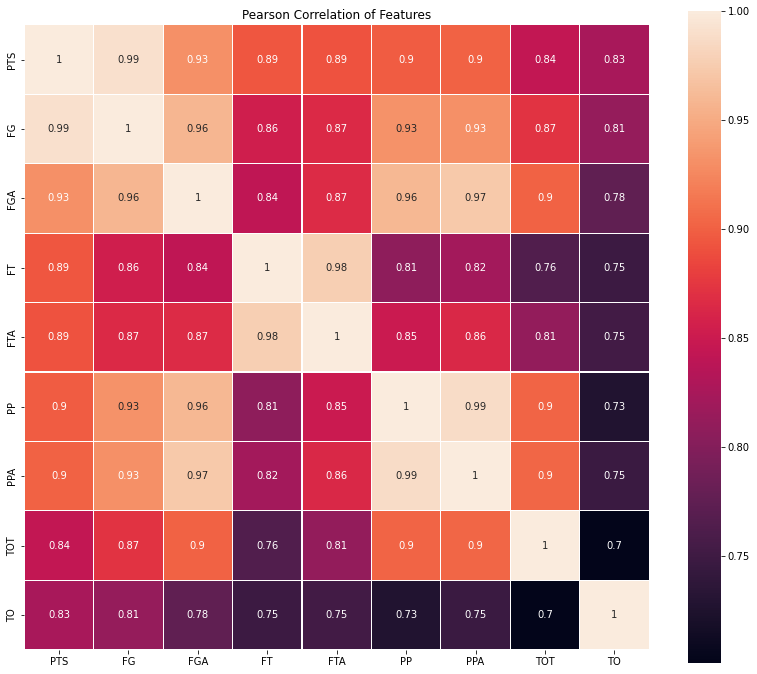

In [18]:
heatmap_data=Data[['PTS', 'FG', 'FGA', 'FT', 'FTA', 'PP', 'PPA', 'TOT', 'TO']]
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features')
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, annot=True)

#데이터 split

In [12]:
X_data=Data.drop('PTS', axis=1)
y_data=Data['PTS']

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.3)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1265, 20) (543, 20) (1265,) (543,)


#sklearn PCA
scaling한 후 PCA를 통해 8개의 주성분 분석

In [15]:
from sklearn.preprocessing import scale
X_scale=pd.DataFrame(scale(X_data), columns=X_data.columns)
X_scale.head()

,년도,선수명,팀,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
0,-1.598831,1.005508,-1.165985,2.337262,2.192710,0.468125,2.238275,1.730816,0.929195,1.529536,1.418622,0.604057,0.987613,2.523699,2.056786,1.389502,1.706007,2.443589,-0.042643,0.839255
1,-1.598831,0.061299,-0.721457,2.337262,2.716189,0.648375,2.814113,2.358759,0.798856,2.056268,1.990085,0.577562,1.995544,2.195267,2.209320,0.853831,1.052962,1.379368,1.905677,0.355322
2,-1.598831,-0.764102,-1.462337,2.157932,2.192710,0.952224,3.389952,2.847159,0.817930,2.758577,2.525832,0.674709,3.563436,3.071086,3.353326,0.241636,2.228442,2.230745,1.349014,1.686139
3,-1.598831,-0.745343,0.908480,2.292429,2.330468,0.638075,1.662436,1.661045,0.496850,2.348897,2.132951,0.740946,0.763629,1.976313,1.675450,0.700782,1.575398,0.953679,1.627346,0.597288
4,-1.598831,1.730860,-0.276929,2.382094,2.716189,0.725625,2.046329,2.428530,0.245708,2.348897,1.990085,0.807182,1.323590,2.085790,1.904251,-0.064462,1.836615,1.379368,1.627346,0.476305


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
X_pca=pca.fit_transform(X_scale)
print("원본 데이터: {}".format(str(X_data.shape)))
print("축소된 데이터: {}".format(str(X_pca.shape)))

원본 데이터: (1808, 20)
축소된 데이터: (1808, 8)


In [ ]:
pca.explained_variance_ratio_

array([0.54192277, 0.09223216, 0.06487644, 0.05185028, 0.05029971,
       0.04852267, 0.03187388, 0.02919714])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9107750493759977

In [ ]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (8, 20)


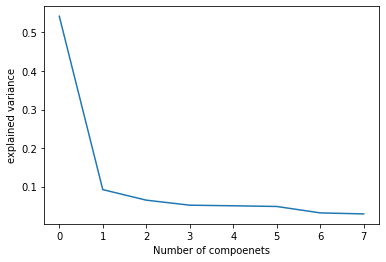

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of compoenets')
plt.ylabel('explained variance')
plt.show()

components의 variance가 0.9보다 큰 n_components 찾음

In [ ]:
pca=PCA(n_components=0.9)
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

8

PCA components와 다른 특성들과의  PCA explained variance

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_

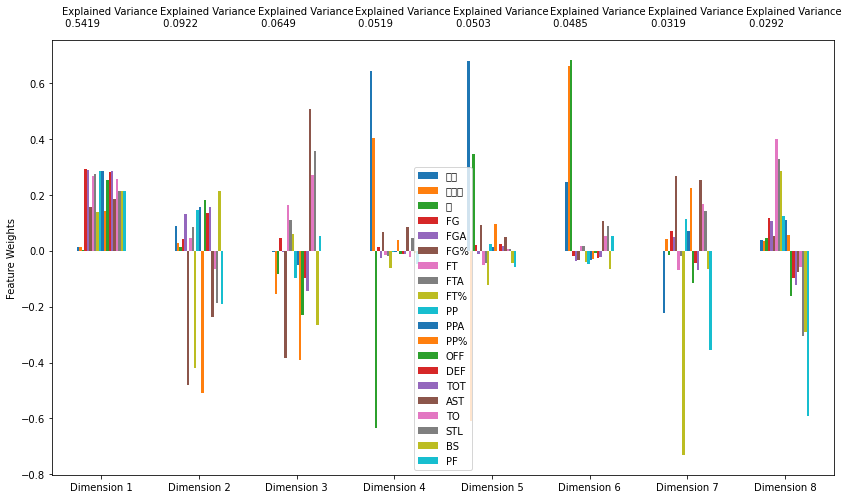

In [ ]:
Dimensions=['Dimension {}'.format(i) for i in range(1, pca.n_components_+1)]

components=pd.DataFrame(np.round(pca.components_, 8), columns=X_data.keys())
components.index=Dimensions

ratios=pca.explained_variance_ratio_.reshape(pca.n_components_, 1)
variance_ratios=pd.DataFrame(np.round(ratios, 8), columns=['Explained Variance'])
variance_ratios.index=Dimensions

fig, ax=plt.subplots(figsize=(14, 8))

components.plot(ax=ax, kind='bar')
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(Dimensions, rotation=0)

for i, var in enumerate(pca.explained_variance_ratio_):
  ax.text(i-0.40, ax.get_ylim()[1]+0.05, "Explained Variance\n %.4f"%(var))

pca_results=pd.concat([variance_ratios, components], axis=1)

In [ ]:
pca_results.cumsum()

,Explained Variance,년도,선수명,팀,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
Dimension 1,0.541923,0.012384,0.012131,0.001960,0.290807,0.289293,0.154506,0.267678,0.274708,0.137634,0.284523,0.286344,0.142404,0.252528,0.282462,0.282849,0.184000,0.255087,0.214419,0.212509,0.211328
Dimension 2,0.634155,0.098772,0.037855,0.015255,0.334072,0.418748,-0.326601,0.312009,0.357659,-0.282091,0.430618,0.443992,-0.364907,0.432015,0.418172,0.438568,-0.053197,0.190443,0.025672,0.424772,0.018913
Dimension 3,0.699031,0.094814,-0.116113,-0.068190,0.377724,0.412480,-0.710116,0.474461,0.468467,-0.222520,0.334379,0.393619,-0.756843,0.203570,0.319481,0.292581,0.451504,0.461375,0.382531,0.157903,0.071089
Dimension 4,0.750882,0.738040,0.285497,-0.701493,0.389789,0.387524,-0.644318,0.459921,0.448423,-0.286208,0.328978,0.389903,-0.717377,0.189884,0.307630,0.279585,0.535884,0.439715,0.427964,0.148183,0.023278
Dimension 5,0.801181,1.416768,-0.324215,-0.356060,0.410192,0.375678,-0.551680,0.407008,0.402470,-0.410666,0.351836,0.403580,-0.622343,0.186811,0.332619,0.296815,0.585760,0.445405,0.435189,0.104892,-0.036703
Dimension 6,0.849704,1.660669,0.335442,0.326418,0.392146,0.337572,-0.584941,0.422920,0.420603,-0.450414,0.305123,0.368858,-0.650671,0.177517,0.305184,0.275015,0.691140,0.497395,0.524375,0.038126,0.016403
Dimension 7,0.881578,1.436576,0.376497,0.310571,0.461156,0.387494,-0.320004,0.351909,0.399654,-1.181183,0.419386,0.440587,-0.427659,0.060904,0.260828,0.204107,0.942456,0.664530,0.664287,-0.027918,-0.340436
Dimension 8,0.910775,1.473282,0.411751,0.353941,0.576145,0.491953,-0.267011,0.751630,0.728183,-0.895049,0.542453,0.551117,-0.370488,-0.100264,0.164603,0.082338,0.864972,0.605624,0.357943,-0.319273,-0.932132


#비지도학습 KMeans
PCA 데이터로 KMeans

In [23]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([274, 306, 136, 258, 834]))


In [21]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=01e8ce1f601c3d6264e9afbbde8f268fa76341675153611ee9df1f708c9f59cf
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


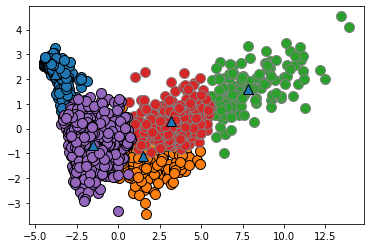

In [24]:
import mglearn
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], km.labels_, markers='o')
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], markers='^')

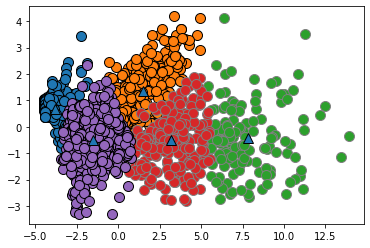

In [36]:
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 2], km.labels_, markers='o')
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 2], markers='^')

기존 데이터로 KMeans

In [44]:
model=KMeans(n_clusters=5)
model.fit(X_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
print(np.unique(KM.labels_, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([474, 326, 288, 344, 376]))


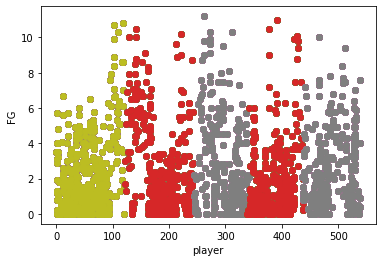

In [74]:
labels=model.labels_
for label in labels:
  plt.scatter(X_data[labels==label][X_data.columns[1]], X_data[labels==label][X_data.columns[3]])
plt.xlabel("player")
plt.ylabel(X_data.columns[3])
plt.show()

# AFFinityPropagation으로 clustering

In [75]:
from sklearn import cluster
AP=cluster.AffinityPropagation()

In [77]:
AP.fit(X_data)
labels=AP.labels_

In [80]:
print(np.unique(AP.labels_, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), array([ 93, 104, 131,  81,  23,  31,  39,  20,  30,  80, 106,  21,  37,
        54, 156,  31,  44, 141,  43,  60,  68,  19, 103,  63,  90,  97,
        16,  17,  10]))


In [81]:
X_data.columns

Index(['년도', '선수명', '팀', 'FG', 'FGA', 'FG%', 'FT', 'FTA', 'FT%', 'PP', 'PPA',
       'PP%', 'OFF', 'DEF', 'TOT', 'AST', 'TO', 'STL', 'BS', 'PF'],
      dtype='object')

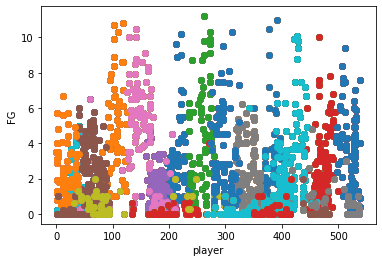

In [85]:
for label in labels:
  plt.scatter(X_data[labels==label][X_data.columns[1]], X_data[labels==label][X_data.columns[3]])
plt.xlabel("player")
plt.ylabel(X_data.columns[3])
plt.show()

In [94]:
len(np.unique(X_data["선수명"]))

540

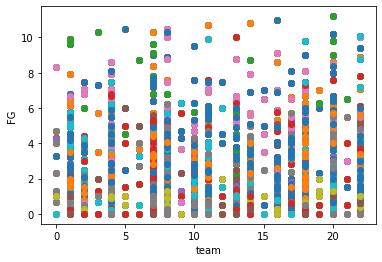

In [88]:
for label in labels:
  plt.scatter(X_data[labels==label][X_data.columns[2]], X_data[labels==label][X_data.columns[3]])
plt.xlabel("team")
plt.ylabel(X_data.columns[3])
plt.show()